## Homework 2
### Maschinelle Intelligenz und Gesellschaft

The homework provides problems, regarding basic applications of linear algebra and machine learning. Use this Notebook to perform the computations and insert your comments into it. Hand in the notebook AND the datasets in the SAME folder! All the coding must be done in Python 3.


Please give credits to your fellow students (groups up to 3) who worked with you on the tasks!

All your plots have to be labelled properly!  (Non labeled plots will result in points deduction!)

**Non running cells/tasks will not be considered!**


#### Date of submission: July 24, 2020, 23:59 hrs

#### Your Name and Matriculation Number:

##### Class mates you worked with on the tasks:

In [113]:
### add modules you need here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The dataset provided (`compas_rec.csv`) is a subset of the real world data used to analize the COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) recidivism risk score algorithm. You have already read about it in [chapter 2 of "Fairness and Machine Learning - Limitations and Opportunities"](https://fairmlbook.org/classification.html).

In [114]:
data = pd.read_csv('compas_rec.csv')
data.head()

,Name,Sex,Age,Race,Juvenile Felonies,Juvenile Misdemeanors,Juvenile Others,Previous Convictions,Degree of Conviction,Days in Jail,COMPAS Score,Recidivism
0,miguel hernandez,Male,69,Other,0,0,0,0,Felony,1,1,0
1,kevon dixon,Male,34,African-American,0,0,0,0,Felony,97,3,1
2,ed philo,Male,24,African-American,0,0,1,4,Felony,2,4,1
3,marsha miles,Male,44,Other,0,0,0,0,Misdemeanor,322,1,0
4,edward riddle,Male,41,Caucasian,0,0,0,14,Felony,7,6,1


The features in the dataset are the following:

| Feature | Definition|       
| :--- |:---|
| _Name_ | Name of convict |
| _Sex_ | Sex |
| _Age_ | Age in years |
| _Race_ | Ethnicity of convict (African-American, Asian, Caucasian, Hispanic, Native American, Other) |
| _Juvenile Felonies_ | # of previous juvenile felonies |
| _Juvenile Misdemeanors_ | # of previous juvenile misdemeanors |
| _Juvenile Others_ | # of other previous juvenile crimes |
| _Previous Convictions_ | # of previous convictions as an adult |
| _Degree of Conviction_ | Degree of current conviction (Misdeameanor, Felony) |
| _Days in Jail_ | # of days of imprisonment for current conviction |
| _COMPAS Score_ | Recidivism Risk Score ((low) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 (high)) |
| _Recidivism_ | Convict was recidivistic during 2 years after current conviction |

### 1. Performance of COMPAS
In the first task the performace of COMPAS should be measured. To do that use the score to classify if a convict will be recidivistic. This approach can be considered as building a simple classifier model.

Hint: The COMPAS score is given as iteger numbers ranging from 1 (low risk of recidivism) to 10 (high risk of recidivism).

a) First scale the score in a way, that it can be used as a class probability (continuous range from 0 to 1). Split your samples in training and test set. Decide and justify which set (train or test) should be used to choose a threshold. Plot and analyse the Precision-Recall curve to find a reasonable threshold. Write what you observe.

In [115]:
pd.options.mode.chained_assignment = None
new_data = data[['COMPAS Score', 'Recidivism']]

#scaling
new_data['COMPAS Score'] = new_data['COMPAS Score']/new_data['COMPAS Score'].max()
new_data.head()

,COMPAS Score,Recidivism
0,0.1,0
1,0.3,1
2,0.4,1
3,0.1,0
4,0.6,1


<font color=green>
For building a classifier, we will take 2 features; COMPAS Score and Recidivism. 

Then, we scale the independent feature (X=COMPAS Score) so that the values fall in the range of 0 to 1. To scale the feature, we divide each of the value by the maximum value of that feature.

</font>

In [116]:
#splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X = np.asarray(new_data[['COMPAS Score']])
y = np.asarray(new_data['Recidivism'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

#Build and train classifier model
lr = LogisticRegression()
lr.fit(X_train, y_train)

#predicted values
yhat = lr.predict(X_test)

#probability of class for predicted values
yhat_pro = lr.predict_proba(X_test)


Training set: (7809, 1) (7809,)
Testing set: (1953, 1) (1953,)


<font color=green>
    After preprocessing, we define X and y. Then we split the data into training and test set using the <b>train_test_split</b> method.
    We now build and train a LogisticRegression model, as it is one of the basic and popular algorithm to solve a classification problem.
    
</font>

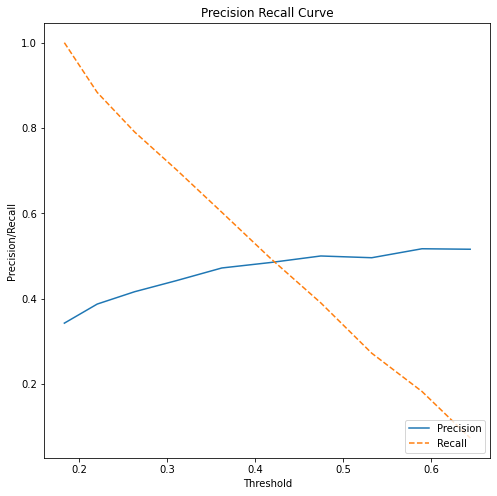

Thresholds:  [0.18337626 0.22070569 0.26318512 0.3105821  0.36231749 0.4174525
 0.47473147 0.53268318 0.58976623 0.6445296 ]


In [117]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])

plt.figure(figsize=[8,8])
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], "--", label="Recall")
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision Recall Curve')
plt.legend(loc='lower right')
plt.show()

print("Thresholds: ", thresholds)

<font color=green>
Now that we have trained our model, it is time to test it with new test set. Default threshold for logistic regression is 0.5 and based on this value, predictions happen on new data. If probability > 0.5, new data belongs to class 1 else to class 0. 

Let us plot a precision-recall curve using our test dataset. From the plot, it is clearly visible that precision and recall show a inverse relationship. And at on point, there is an intersection between two curves. That value is the reasonable threshold and from the list of threshold values, it is 0.4174525. So let us round and consider 0.42
</font>

b) Test your threshold and print the accuracy. Think of a simple way to get a reference for the accuracy. Write what you observe.

Hint: The 'most simple classifier' always returns the same class.

In [118]:
from sklearn.preprocessing import binarize
from sklearn import metrics

yhat_pred_class = binarize(lr.predict_proba(X_test),threshold=0.42)[:,1].astype(int)

print("Accuracy:",metrics.accuracy_score(y_test, yhat_pred_class))

Accuracy: 0.6574500768049155


<font color=green>
Inorder to test the threshold, we use a binarize function over predict_proba() at new threshold, to get the new predicted class values <b>yhat_pred_class</b>.

To find the accuracy of the model, we directly used an <b>accuracy_score()</b> function from metrics module. The result showed a 65.7% accuracy. As looking only at accuracy is not a good measure for classifier performance, we should look into other measures such as confusion matrix, ROC curves.
</font>

c) If you want to measure the performance of a classification it is not a good idea to just look at the accuracy. Which other measures for a binary classifier do you know? Extend your test by calculating, printing and interpreting them for your chosen threshold. Which metrics give better clues in this particular classification problem? Which ones whould you try to optimize? Based on this results, would you use the COMPAS algorithm to keep high risk convicts in custody after they served their full sentence?

In [119]:
from sklearn.metrics import confusion_matrix

#confusion matrix for the classifier on selected threshold=0.4174525
cnf_matrix = confusion_matrix(y_test, yhat_pred_class)
confusion_df = pd.DataFrame(data=cnf_matrix, index=['actual: 1', 'actual: 0'], columns=['pred: 1','pred: 0'])
print(confusion_df)

TP = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]
TN = cnf_matrix[1][1]

accuracy = (TN + TP) / (TN + FN + TP + FP)
print ('\nAccuracy:', accuracy)
precision = TP / (TP + FP)
print('Precision:', precision)
recall = TP / (TP + FN)
print('Recall:', recall)
F1 = 2 * (precision * recall) / (precision + recall)
print('F1:', F1)

           pred: 1  pred: 0
actual: 1     1023      261
actual: 0      408      261

Accuracy: 0.6574500768049155
Precision: 0.7967289719626168
Recall: 0.7148846960167715
F1: 0.7535911602209944


<font color=green>
Since accuracy alone is not sufficient in determining the performance, we used confusion matrix. The model got a 0.796 precision which shows the ratio of correctly predicted positive observations to the total predicted observations and a recall of 0.714 which shows the ratio of correctly predicted positive observations to all the observations in actual class. Both precision and recall shows a good sign.
    
Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.753. 

But an accuracy of 65.7% is still a problem.
</font>

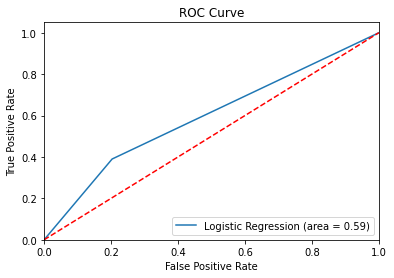

In [120]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, yhat_pred_class)
#Area under curve score for the classifier with new threshold 0.4174525
logit_roc_auc = roc_auc_score(y_test, yhat_pred_class)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<font color=green>
To get a clear idea on the model performance, let us plot an roc curve. As seen, area under curve is 0.59 and it means model has less class separation capacity. Ideal good model should be having near to 1 as auc.
    
Since, model has a less performance, we should try adding more features and see the model performance.
</font>

After analysing the performance of the COMPAS score, you have a reference and are now able to build your own classifiers (independent from the COMPAS score) and compare them.
### 2. Linear Discriminant Analysis

In this second task you are asked to generate a binary classifier using Linear Discriminat Analysis (LDA). Similar to the COMPAS score, the task is to classify if a convict will be recidivistic based on the given dataset.

Hint: There are features in the dataset that should not be used in the LDA.

a) First of all you need to take care of some of the variables in the dataset that can not be used directly to perform a regression on.

In [121]:
new_data_frame = data[['Age', 'Juvenile Felonies', 'Juvenile Others', 'Juvenile Misdemeanors', 'Previous Convictions', 
                       'Days in Jail', 'Recidivism']]

new_data_frame['Age'] = (new_data_frame['Age'] - new_data_frame['Age'].min())/(new_data_frame['Age'].max() - new_data_frame['Age'].min())
new_data_frame['Juvenile Felonies'] = (new_data_frame['Juvenile Felonies'] - new_data_frame['Juvenile Felonies'].min())/(new_data_frame['Juvenile Felonies'].max() - new_data_frame['Juvenile Felonies'].min())
new_data_frame['Juvenile Misdemeanors'] = (new_data_frame['Juvenile Misdemeanors'] - new_data_frame['Juvenile Misdemeanors'].min())/(new_data_frame['Juvenile Misdemeanors'].max() - new_data_frame['Juvenile Misdemeanors'].min())
new_data_frame['Juvenile Others'] = (new_data_frame['Juvenile Others'] - new_data_frame['Juvenile Others'].min())/(new_data_frame['Juvenile Others'].max() - new_data_frame['Juvenile Others'].min())
new_data_frame['Previous Convictions'] = (new_data_frame['Previous Convictions'] - new_data_frame['Previous Convictions'].min())/(new_data_frame['Previous Convictions'].max() - new_data_frame['Previous Convictions'].min())
new_data_frame['Days in Jail'] = (new_data_frame['Days in Jail'] - new_data_frame['Days in Jail'].min())/(new_data_frame['Days in Jail'].max() - new_data_frame['Days in Jail'].min())

new_data_frame.head()

,Age,Juvenile Felonies,Juvenile Others,Juvenile Misdemeanors,Previous Convictions,Days in Jail,Recidivism
0,0.653846,0.0,0.000000,0.0,0.000000,0.000000,0
1,0.205128,0.0,0.000000,0.0,0.000000,0.048558,1
2,0.076923,0.0,0.090909,0.0,0.093023,0.000506,1
3,0.333333,0.0,0.000000,0.0,0.000000,0.162367,0
4,0.294872,0.0,0.000000,0.0,0.325581,0.003035,1


<font color=green>
We will not be using categorical features such as Sex, Race, Degree of Convictions. So we created a new dataset ith other continuous independent features(excluding COMPAS Score) and one dependent categorical variable (Recidivism).
    
To perform regression, we have standardized the features.
</font>

b) Define X and y and perform a PCA on X. Use a common way to plot the influence of the features on the first three components. Write what you observe.
Decide if Scores or Loadings plot are better suited to show the influence of the features and plot it for the first three components.

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# define X
X = new_data_frame.iloc[:,:5]

# define y
y = np.asarray(new_data_frame['Recidivism']).reshape(-1, 1)

# Perform PCA on X
pca = PCA(n_components=3)
pca.fit_transform(X)
X_transformed = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_transformed, columns=['PCA1', 'PCA2', 'PCA3'])
y_df = new_data_frame[['Recidivism']]
new_df = pd.concat([pca_df, y_df], axis=1)
new_df.head()

,PCA1,PCA2,PCA3,Recidivism
0,0.413788,-0.159941,0.025775,0
1,-0.025405,-0.073198,-0.003998,1
2,-0.136138,0.048469,0.059036,1
3,0.100079,-0.097982,0.004508,0
4,0.127475,0.225944,-0.030405,1


<font color=green>
Now that we have our new data set, define X with independent features and y with dependent feature. After defining, we performed PCA with 3 components on X.
</font>

In [123]:
loadings = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=new_data_frame.columns[:5])
loadings

,PCA1,PCA2,PCA3
Age,0.978774,-0.193314,0.066351
Juvenile Felonies,-0.005157,0.045505,0.018065
Juvenile Others,-0.042149,0.071034,0.888654
Juvenile Misdemeanors,-0.017039,0.102858,0.442364
Previous Convictions,0.199770,0.972077,-0.099396


<font color=green>

</font>

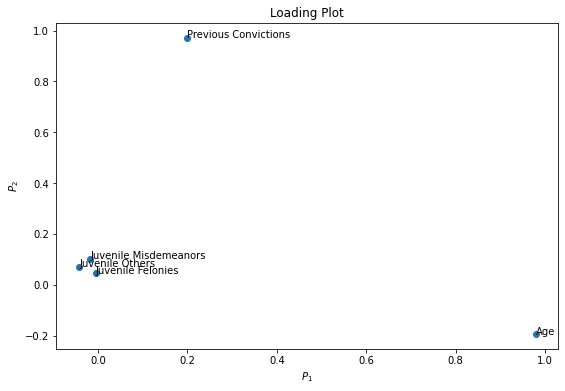

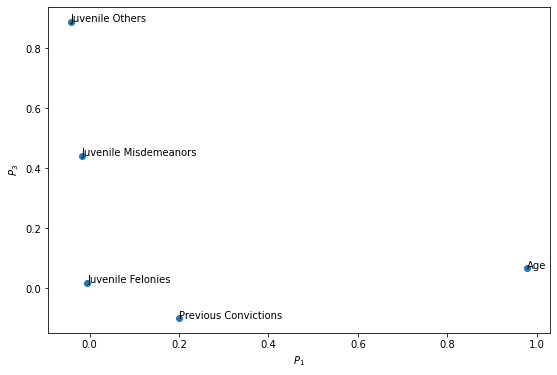

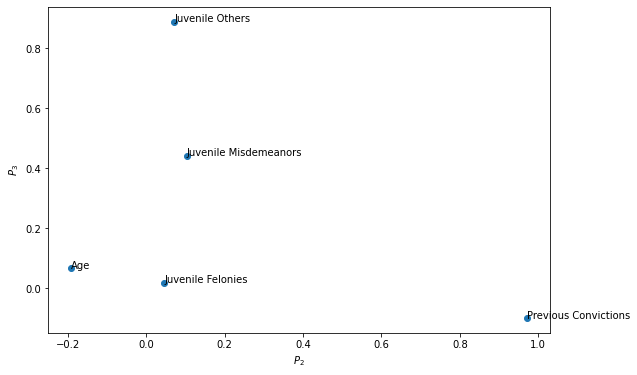

In [124]:
plt.figure(figsize=(9,6))
plt.title('Loading Plot')
plt.xlabel('$P_1$')
plt.ylabel('$P_2$')
plt.scatter(x=loadings['PCA1'],y=loadings['PCA2'])
for i, label in enumerate(loadings.index):
    plt.annotate(label, (loadings.iloc[i,0], loadings.iloc[i,1]))
plt.show()

plt.figure(figsize=(9,6))
plt.xlabel('$P_1$')
plt.ylabel('$P_3$')
plt.scatter(x=loadings['PCA1'],y=loadings['PCA3'])
for i, label in enumerate(loadings.index):
    plt.annotate(label, (loadings.iloc[i,0], loadings.iloc[i,2]))
plt.show()

plt.figure(figsize=(9,6))
plt.xlabel('$P_2$')
plt.ylabel('$P_3$')
plt.scatter(x=loadings['PCA2'],y=loadings['PCA3'])
for i, label in enumerate(loadings.index):
    plt.annotate(label, (loadings.iloc[i,1], loadings.iloc[i,2]))
plt.show()

<font color=green>
Now that we have loadings of our components, we will show a loadings plot for the 3 components, that is good in plotting the influence of each features.

The loading plot graphs the coefficients of each variable for the first component versus the coefficients for the second component.

<i><b>First Plot</b></i>
In the first plot, Age has a value 0.978774 in PCA1 which is close to 1, indicating it has strong influence on the PCA1 component. After age, secondmost feature influenced on PCA1 is Previous Convictions. Other features apart from these 2, has value close to 0, indicating a weak influence on the component. 

In the above similar way, comparisons can be observed from the other two plots. In second plot, Previous Convictions has a value 0.972077, showing its strongest influence on PCA2.
</font>

c) Perform a LDA utilizing PCR. As always when creating a new model, perform an appropriate cross validation. Can you think of a very simple way to ensure that your classifier is not biased by race? Print the accuracy and a confusion matrix. Write what you observe.

Hint: You need untouched data for a final test of your classifier.

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Keep aside a dataset to do a final test
X_final_test_data = X_test[2000:2929]
y_final_test_data = y_test[2000:2929]

X_test = X_test[0:2000]
y_test = y_test[0:2000]

# Perform cross-validation
X_test = (X_test - X_train.mean()) / X_train.std()
X_final_test_data = (X_final_test_data - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()
        
y_train_mean = y_train.mean()
y_train = y_train - y_train.mean()

pca = PCA(n_components = 3)
lr_model = LinearRegression()

lr_model.fit(pca.fit_transform(X_train), y_train)
y_pred = lr_model.predict(pca.transform(X_test)) + y_train_mean
print(y_pred)


[[0.33382463]
 [0.27660771]
 [0.32706527]
 ...
 [0.23806039]
 [0.34640683]
 [0.29875884]]


<font color=green>
Race being a categorical feature, we have not included it in the dataset. Hence, our LinearRegression model will not be influenced by it.

To do training and testing, we splitted the data using <b>train_test_split</b> function and for a final test on the classifier, we decided to keep aside a set of untouched data.

After doing cross validation, we built a linear regression model, applied pca over it and trained the resultant. After training, we did an initial test and stored the predictions in <b>y_pred</b>.

Now we will see it's accuracy and confusion matrix.
</font>

In [126]:
from sklearn.metrics import confusion_matrix
# Define a threshold and get the new predicted class
threshold = .5

y_pred_bin = y_pred
y_pred_bin[y_pred_bin < threshold] = 0
y_pred_bin[y_pred_bin >= threshold] = 1

# Print confusion matrix and accuracy
lr_model_cnf = confusion_matrix(y_test, y_pred_bin)

confusion_df = pd.DataFrame(lr_model_cnf, index=['actual: 1', 'actual: 0'], columns=['pred: 1','pred: 0'])
print(confusion_df)

#print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_bin))
TP = lr_model_cnf[0][0]
FP = lr_model_cnf[0][1]
FN = lr_model_cnf[1][0]
TN = lr_model_cnf[1][1]
accuracy = (TN + TP) / (TN + FN + TP + FP)
print ('Accuracy is:', accuracy)

           pred: 1  pred: 0
actual: 1     1264       54
actual: 0      615       67
Accuracy is: 0.6655


<font color=green>
We defined a threshold of 0.5 and obtained a new class of predictions based on it. After this step, we created a confusion matrix with actual test data and new predicted data. It showed a total of 1340 correct predictions and 660 incorrect predictions with an accuracy of 67%. A slight improvement from the first task's classifier.
</font>

d) Perform a final test of your classifier. Use an appropriate metric and compare it to your findings from the first task. How would you rate the performance of your classifier?

In [127]:
y_final_pred = lr_model.predict(pca.transform(X_final_test_data)) + y_train_mean

threshold = .5

y_final_pred_bin = y_final_pred
y_final_pred_bin[y_final_pred_bin < threshold] = 0
y_final_pred_bin[y_final_pred_bin >= threshold] = 1

cnf_matrix_final_test = confusion_matrix(y_final_test_data, y_final_pred_bin)
cnf_matrix_final_df = pd.DataFrame(cnf_matrix_final_test, index=['actual: 1', 'actual: 0'], columns=['pred: 1','pred: 0'])
print(cnf_matrix_final_df)

#print("Accuracy is:", metrics.accuracy_score(y_final_test_data, y_final_pred_bin))
TP = cnf_matrix_final_test[0][0]
FP = cnf_matrix_final_test[0][1]
FN = cnf_matrix_final_test[1][0]
TN = cnf_matrix_final_test[1][1]
accuracy = (TN + TP) / (TN + FN + TP + FP)
print ('Accuracy is:', accuracy)

           pred: 1  pred: 0
actual: 1      555       19
actual: 0      318       37
Accuracy is: 0.6372443487621098


<font color=green>
On final test of the classifier, an accuracy of 63.7% was obtained. This is lesser from previous step. 
So inorder to get more clarity, we decided to plot roc curve.
</font>

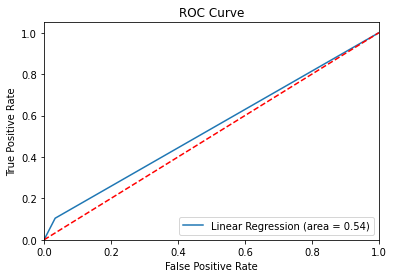

In [128]:
fpr, tpr, thresholds = roc_curve(y_final_test_data, y_final_pred)

#Area under curve score for the classifier with default threshold 0.5
logit_roc_auc = roc_auc_score(y_final_test_data, y_final_pred_bin)

plt.figure()
plt.plot(fpr, tpr, label='Linear Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<font color=green>
 An ROC Curve was built, and when compared with first task's ROC Curve(0.59), the area is almost same ie;0.54. So performance wise there is not much difference. It's still looks like not stable.
</font>

### 3. Classification Tree
Now try a similar classification using a decision tree. As trees are very easy to interpret, you should also include the ethnicity of convicts in your X this time and see if it has an influence.

a) In a first step define X, y, training and test set. Generate two plots using an appropriate method to show the distribution of the ethnicity and the classes in your subsets. Interpret your plots.

In [129]:
data['Ethnicity'] = (data['Race'].astype('category')).cat.codes
#data['Sex'] = (data['Sex'].astype('category')).cat.codes
new_data_frame2 = data[['Age', 'Ethnicity', 'Juvenile Felonies', 'Juvenile Misdemeanors', 'Juvenile Others', 'Previous Convictions',
                        'Days in Jail', 'Recidivism']]

X = new_data_frame2.iloc[:,:7]

# define y
y = new_data_frame2.Recidivism

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=350)

<font color=green>
In this classification tree, we include ethnicity to see its influence on the classifier. For classification purpose, ethnicity being a categorical feature, we applied an integer encoding scheme on the 'Race' column.

Then, both X and y is defined and data is split into training and test set.
</font>

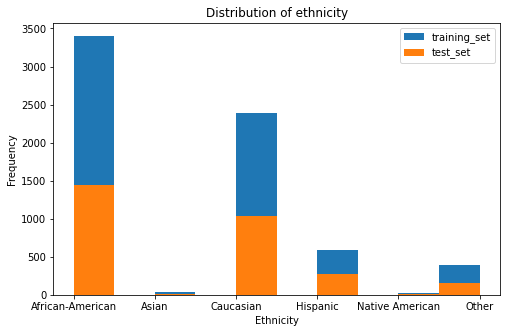

In [130]:
# Plot distribution of ethnicity
plt.figure(figsize=[8,5])
plt.hist(X_train['Ethnicity'], label='training_set')
plt.hist(X_test['Ethnicity'], label='test_set')
plt.xticks(np.arange(6), ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other'])
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Ethnicity')
plt.title("Distribution of ethnicity")
plt.show()

<font color=green>
We plotted the distribution of ethnicity on two data sets. From the plot, African-American has more frequency on both the training and test set. Then comes Caucasian. And the lowest among is Native American.
</font>

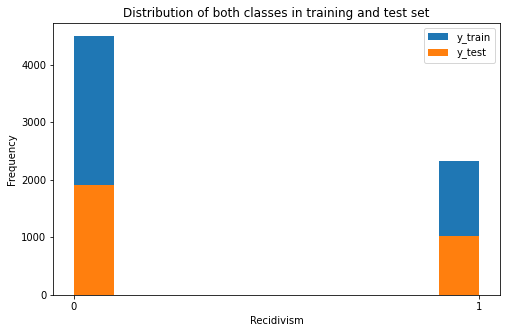

In [131]:
# Plot distribution of classes
plt.figure(figsize=[8,5])
plt.hist(y_train, label='y_train')
plt.hist(y_test, label='y_test')
plt.xticks([0, 1])
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Recidivism')
plt.title("Distribution of both classes in training and test set")
plt.show()

<font color=green>

The above plot shows the distribution of classes 0 and 1 on the data sets. Number of convicts who belongs to class 0 is more than the number of convicts in class 1.
</font>

b) Grow your tree and try to find good parameters using a cross validation. Write what you observe.

Accuracy of CV: 0.6650065709074278


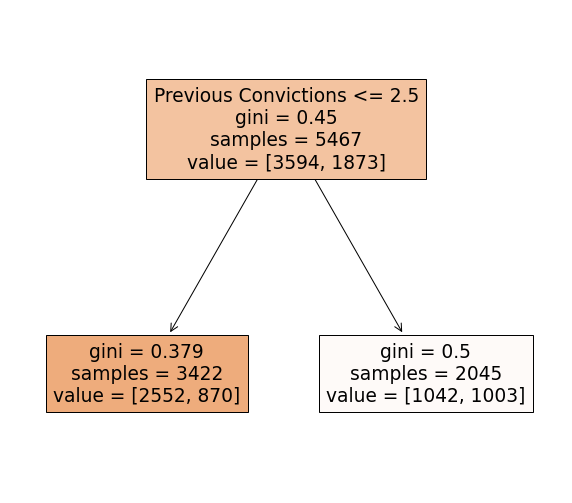

In [132]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold

md=3
mss=2
mln=2
clf = DecisionTreeClassifier(random_state=42, max_depth=md, min_samples_split=mss, max_leaf_nodes=mln)

ns = 5

kf = StratifiedKFold(n_splits=ns, shuffle=True)

acc_val = np.zeros(ns)

for i, (train_index, val_index) in enumerate(kf.split(X_train,y_train)):
    
    clf.fit(X.iloc[train_index,:],y.iloc[train_index])
    
    acc_val[i] = clf.score(X.iloc[val_index,:],y.iloc[val_index])

print('Accuracy of CV:', np.mean(acc_val))
plt.figure(figsize=[10,9])
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()

<font color=green>
We do cross validation on the data inorder to fine-tune our classifier by resampling the dataset 
into training and validation. So, first we do cross validation with 5 folds and train the tree. 

Initially, we have kept a maximum-depth=3 for the tree. The max depth allows the tree to grow and more deeper makes
the tree more complex leading to overfitting. Even keeping it too low is also not good.

Now, we cross validated the dataset and trained our model and it came up with an accuracy of 66.5%.

Lets grow the tree again.
</font>

<font color=green>

</font>

Accuracy of CV: 0.6841805537555923


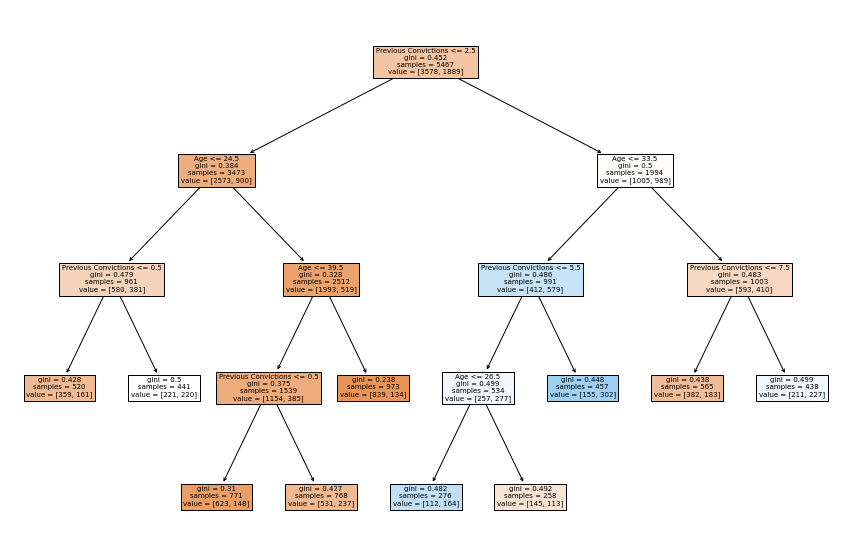

In [134]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

md=5
mss=2
mln=10
clf = DecisionTreeClassifier(random_state=42, max_depth=md, min_samples_split=mss, max_leaf_nodes=mln)

ns = 5

kf = StratifiedKFold(n_splits=ns, shuffle=True)

acc_val = np.zeros(ns)

for i, (train_index, val_index) in enumerate(kf.split(X_train,y_train)):
    
    clf.fit(X.iloc[train_index,:],y.iloc[train_index])
    
    acc_val[i] = clf.score(X.iloc[val_index,:],y.iloc[val_index])


print('Accuracy of CV:', np.mean(acc_val))
plt.figure(figsize=[15,10])
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()

<font color=green>
We grew the tree by maximumdepth = 5 and performed cross validation with same number of folds. It came up with an 
accuracy of 68.42% , a bit more than earlier one.
</font>

c) Grow, test and plot your final tree. Also print the accuracy. How would you rate the performance of your classifier?

Accuracy of CV: 0.6897401733605666


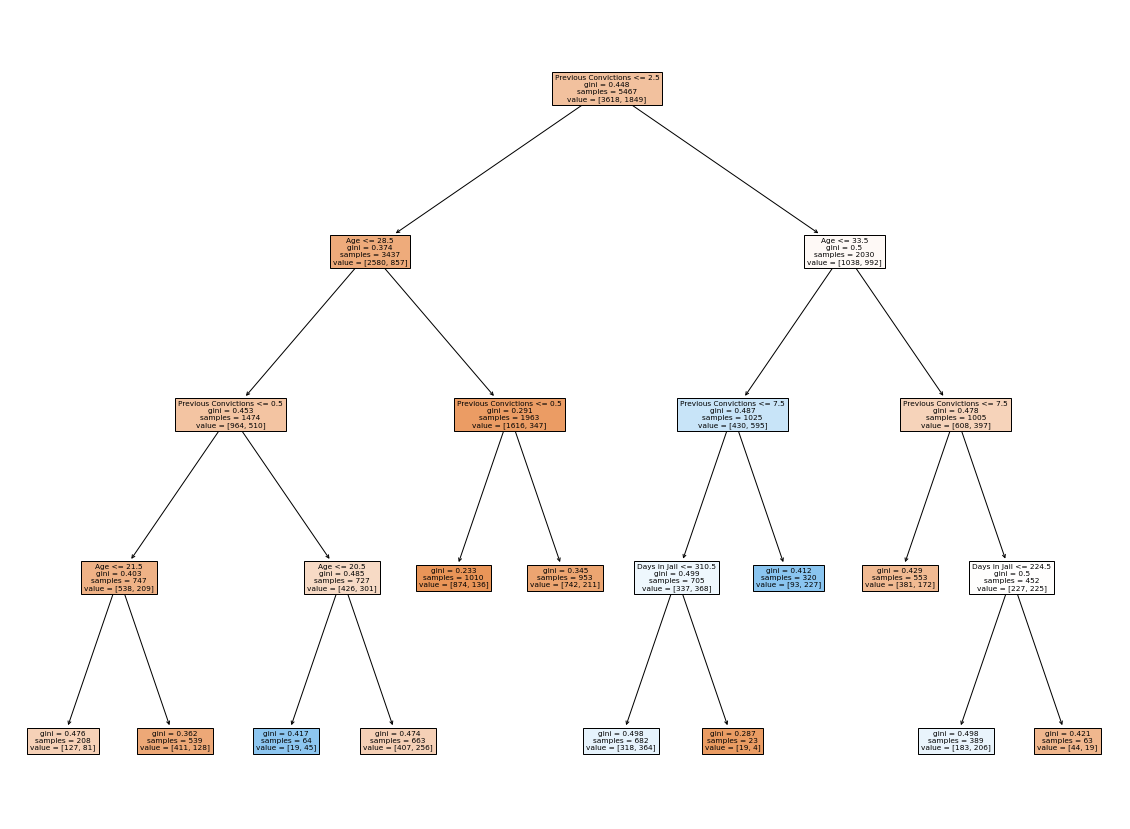

In [135]:
md=10
mss=2
mln=12

clf = DecisionTreeClassifier(random_state=42, max_depth=md, min_samples_split=mss, max_leaf_nodes=mln, criterion='gini')

from sklearn.model_selection import StratifiedKFold

ns = 5

kf = StratifiedKFold(n_splits=ns, shuffle=True)

acc_val = np.zeros(ns)

for i, (train_index, val_index) in enumerate(kf.split(X_train,y_train)):
    
    clf.fit(X.iloc[train_index,:],y.iloc[train_index])
    
    acc_val[i] = clf.score(X.iloc[val_index,:],y.iloc[val_index])
    
print('Accuracy of CV:', np.mean(acc_val))
plt.figure(figsize=[20,15])
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()

<font color=green>
We grew the tree again by maximumdepth = 10 and performed cross validation with same number of folds. It came up with an accuracy of 68.9% almost same as earlier one.
</font>

In [136]:
clf.fit(X_train,y_train)
print('Accuracy of final model with test set:', clf.score(X_test,y_test))

Accuracy of final model with test set: 0.6756572208945032


<font color=green>
We did a final validation of the tree using the data set and the accuracy came out as 67.5%. Let us verify 
performance of the classifier using other metrics.
</font>

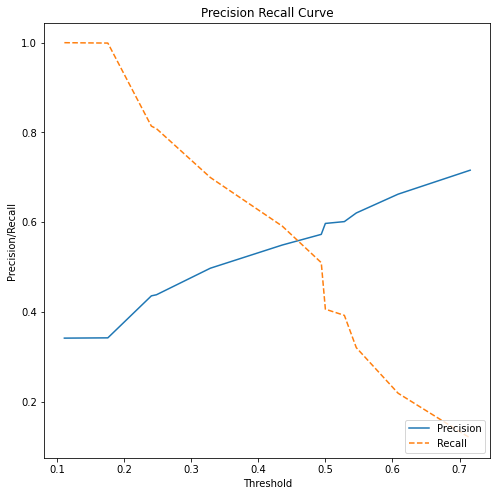

In [137]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, clf.predict_proba(X_train)[:,1])
plt.figure(figsize=[8,8])
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], "--", label="Recall")
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [138]:
from sklearn.metrics import roc_curve, auc

fpr_train, tpr_train, thresholds = roc_curve(y_train,clf.predict_proba(X_train)[:,1])
fpr_test, tpr_test, thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1])

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

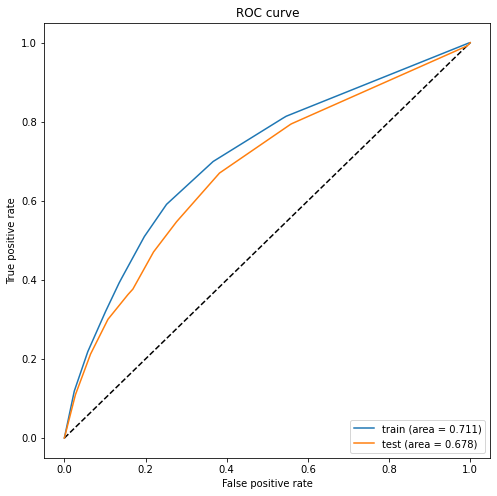

In [139]:
plt.figure(figsize=[8,8])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='train (area = {:.3f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='test (area = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

<font color=green>
We plotted an ROC curve for the decision tree and the area under curve got improved when compared to previous models. For training set, an area of 0.711 and for test an area of 0.678
</font>

In [140]:
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_test,clf.predict(X_test))

cm_test_df = pd.DataFrame(data=cm_test, index=['pred: 0', 'pred: 1'], columns=['actual: 0','actual: 1'])
print()
print('Confusion matrix:')
print(cm_test_df)


Confusion matrix:
         actual: 0  actual: 1
pred: 0       1608        299
pred: 1        651        371


<font color=green>
We also generated confusion matrix to get an idea of how many correct predictions and incorrect predictions happened.
</font>

d) Go back up where you performed the PCA (2.a)) and look at your plots/interpretations: Compare the most important features of the first 2 components to the important features in your tree. Are there similarities or differences and why? As a final conclusion of your findings in this notebook would you say, that including the ethnicity into the decision is beneficial? Do you think judges should use algorithms like this? Base your argumentation on the findings of your notebook (no essay).

<font color=green>
When we compare the PCA plots, we saw that Age and Previous Convictions influenced mostly. And when we see the tree, the root node at which splitting happened is Previous Convictions and at the next level it is Age. Feature wise both are having similarity. And due to the cross validation, accuracy is bit more improved in decision tree. 

From the tree, it is observed that, ethnicity didn't had much influence.
Based on the above findings, the first two of algorithms seems to be not stable in predicting the class but decision tree comes as a better option among three. But I think, we should try to include/collect more features if any related with the COMPAS and see how well it is improving the model performance
</font>